In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('6061_temp - Sheet1 (1).csv')

In [3]:
df.head(5)

,alloy,temp(c),Yield st(MPa)
0,6061.0,15.85014,317.96116
1,NaN,19.69261,319.41748
2,NaN,23.53507,321.35922
3,NaN,27.85782,321.35922
4,NaN,32.18060,320.87379


In [4]:
df.shape

(124, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   alloy          1 non-null      float64
 1   temp(c)        124 non-null    float64
 2   Yield st(MPa)  124 non-null    float64
dtypes: float64(3)
memory usage: 3.0 KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

alloy            123
temp(c)            0
Yield st(MPa)      0
dtype: int64

In [8]:
df.drop('alloy',axis='columns',inplace=True)

In [9]:
df.dtypes

temp(c)          float64
Yield st(MPa)    float64
dtype: object

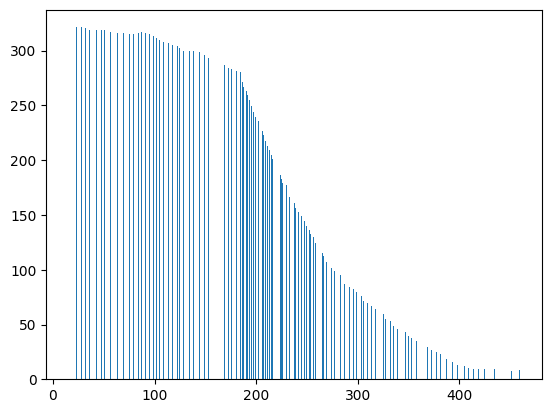

In [10]:
bars = plt.bar(df['temp(c)'],df['Yield st(MPa)'])

plt.show()

In [11]:
cols_to_scale = ['temp(c)','Yield st(MPa)']

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [13]:
df.head(5)

,temp(c),Yield st(MPa)
0,0.000000,0.989181
1,0.008677,0.993818
2,0.017354,1.000000
3,0.027115,1.000000
4,0.036876,0.998454


In [14]:
df.sample(5)

,temp(c),Yield st(MPa)
76,0.542299,0.389490
66,0.483731,0.523957
24,0.221258,0.953632
28,0.254881,0.931994
79,0.557484,0.352396


In [15]:
df.corr()['Yield st(MPa)']

temp(c)         -0.963075
Yield st(MPa)    1.000000
Name: Yield st(MPa), dtype: float64

In [16]:
 x = df.drop('Yield st(MPa)',axis=1)
 y = df['Yield st(MPa)']

In [17]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=3)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [19]:
lr = LinearRegression()

In [20]:
lr.fit(x_train,y_train)

LinearRegression()

In [21]:
y_pred = lr.predict(x_test)

In [22]:
r2_score(y_test,y_pred)

0.9368388140423655

In [23]:
lr.score(x_train, y_train)

0.9244909896067857

In [24]:
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

In [25]:
from sklearn.metrics import mean_squared_error

In [26]:
from matplotlib import legend
# Function for evaluation metric for regression
def EvaluationMetric(Xt,yt,yp,disp="on"):
    ''' Take the different set of parameter and prints evaluation metrics '''
    MSE=round(mean_squared_error(y_true=yt,y_pred=yp),4)
    RMSE=(np.sqrt(MSE))
    R2=(r2_score(y_true=yt,y_pred=yp))
    Adjusted_R2=(1-(1-r2_score(yt, yp))*((Xt.shape[0]-1)/(Xt.shape[0]-Xt.shape[1]-1)))
    if disp=="on":
        print("MSE :",MSE,"RMSE :", RMSE)
        print("R2 :",R2,"Adjusted R2 :",Adjusted_R2)
    
    #Plotting Actual and Predicted Values
    plt.figure(figsize=(18,6))
    plt.plot((yp)[:100]) 
    plt.plot((np.array(yt)[:100]))
    plt.legend(["Predicted","Actual"])
    plt.title('Actual and Predicted Yeild strength')
    
    return (MSE,RMSE,R2,Adjusted_R2) 

MSE : 0.0094 RMSE : 0.09695359714832658
R2 : 0.9244909896067857 Adjusted R2 : 0.9237125462006701


(0.0094, 0.09695359714832658, 0.9244909896067857, 0.9237125462006701)

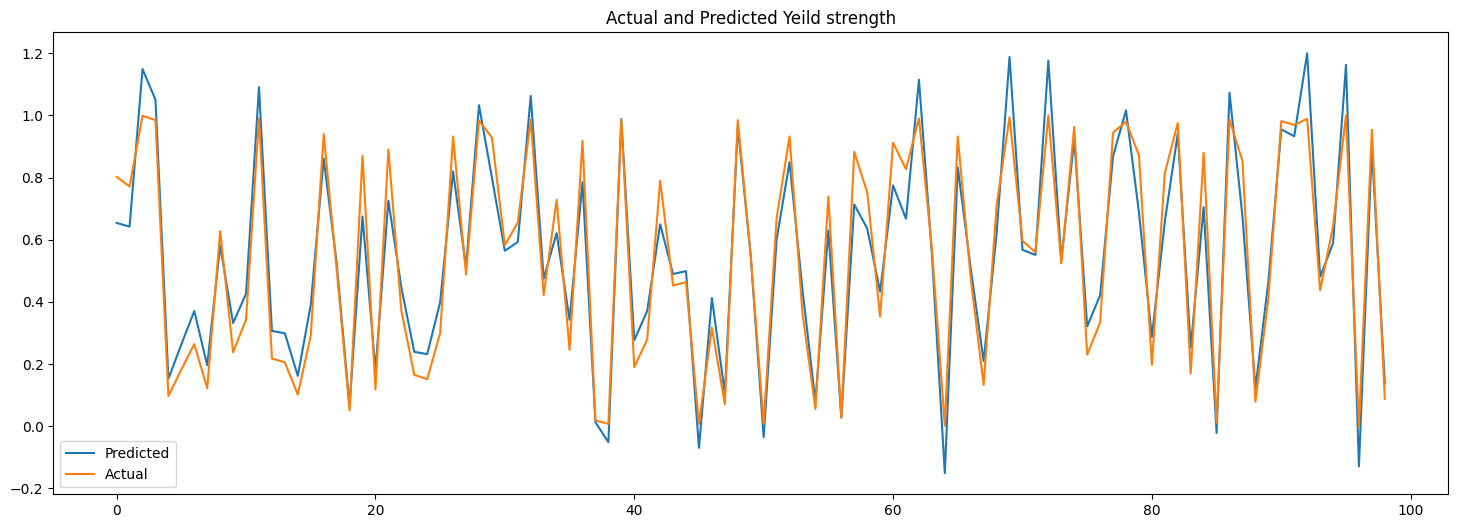

In [27]:
EvaluationMetric(x_train,y_train,y_pred_train)

MSE : 0.0089 RMSE : 0.09433981132056604
R2 : 0.9368388140423655 Adjusted R2 : 0.9340926755224683


(0.0089, 0.09433981132056604, 0.9368388140423655, 0.9340926755224683)

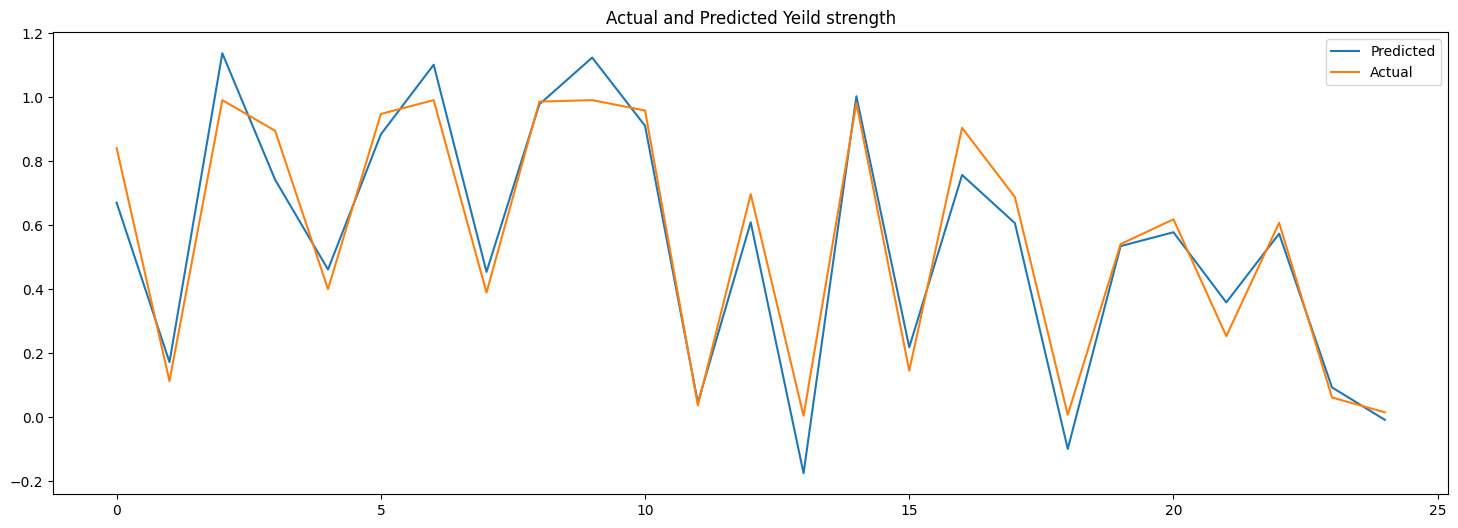

In [28]:
EvaluationMetric(x_test,y_test,y_pred_test)

In [29]:
intercept = lr.intercept_
coefficients = lr.coef_

print("Intercept: ", intercept)
print("Coefficients: ", coefficients)

Intercept:  1.1996705172123177
Coefficients:  [-1.37471207]


In [30]:
b = lr.predict([[0.898048]])

C:\Users\prakhar\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [31]:
b

array([-0.0348869])